In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('Social_Network_Ads.csv')

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


the goal is to predict whether a user will purchase a product based on age and estimated salary

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
X = data.iloc[:,2:4].values

In [8]:
y = data.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)

In [41]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state = 42)

In [42]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [43]:
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [45]:
print(accuracy_score(y_test,y_pred))

0.9125


In [46]:
print("confusion matrix :",confusion_matrix(y_test,y_pred))

confusion matrix : [[47  5]
 [ 2 26]]


In [47]:
dist = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test,y_pred)
)

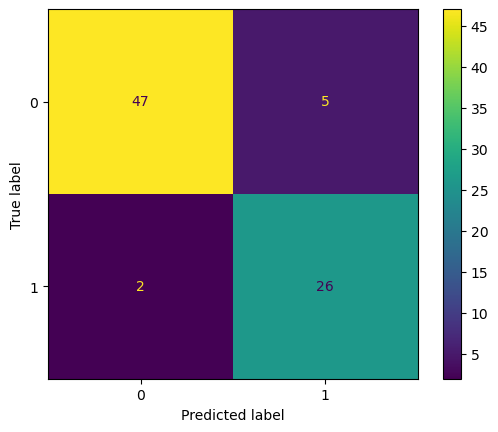

In [39]:
dist.plot()

#### TRUE-NEGATIVE -- 46 (46 MEMBERS DIDNT BUY THE PRODUCT AND MODEL ESTIMATED CORRECTLY)
#### TRUE-POSITIVE -- 21 (21 BOUGHT PRODUCT AND MODEL PREDICTED CORRECTLY)

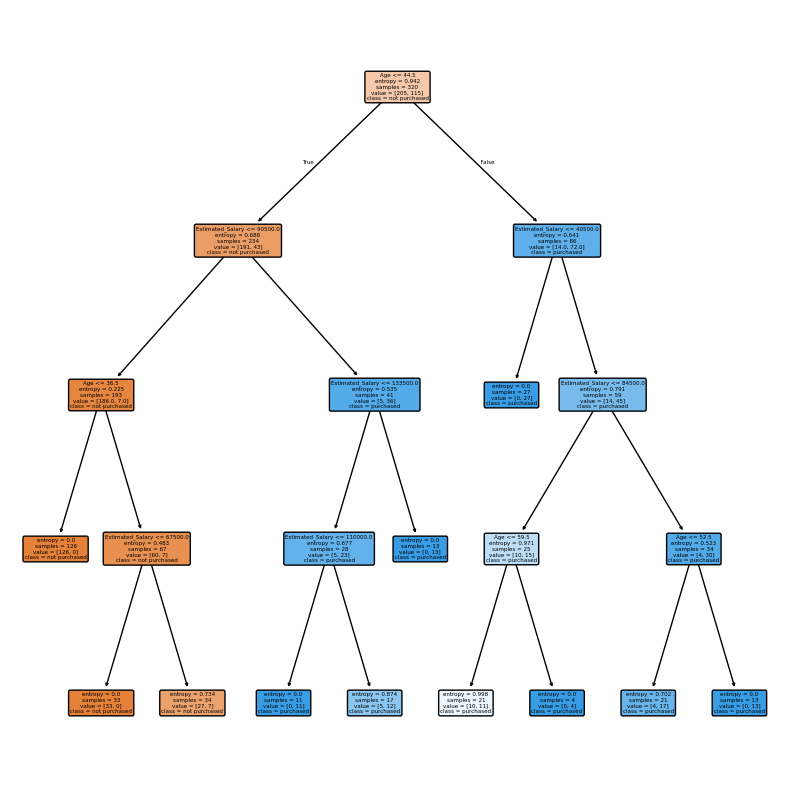

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(
    model,
    feature_names = ["Age","Estimated_Salary"],
    class_names =["not purchased","purchased"],
    filled=True,
    rounded =True
)
plt.show()